In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('cr_loan2.csv')

# Explore the data types of each column
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

We inspect the dataset using functions like info() and describe() to understand its structure and summary statistics.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Data Preparation
To ensure the dataset is suitable for modeling, we need to handle missing values, encode categorical variables, and split the data into training and testing sets.

### Handling Missing Values

In [13]:
# Check columns with null values
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [71]:
# Impute the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace = True)

In [73]:
# Drop the records with missing values for interest rate 
print(df['loan_int_rate'].isnull().sum())
indices = df[df['loan_int_rate'].isnull()].index
df = df.drop(indices)
df.shape

3116


(29465, 12)

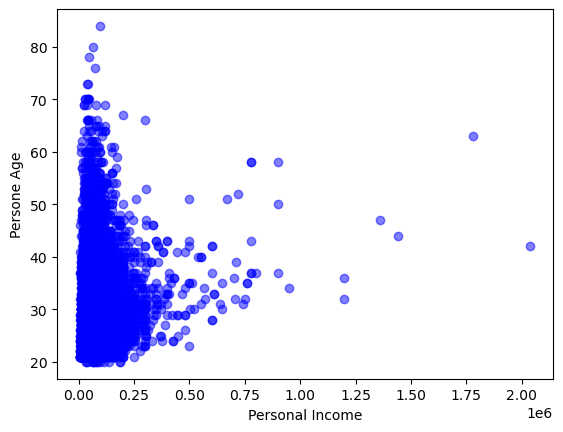

In [41]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

### Finding Outliers

In [77]:
# Use Pandas to drop the record from the data frame and create a new one
df = df.drop(df[df['person_age'] > 100].index)



In [81]:
# Create an array of indices where employment length is greater than 60
indices = df[df['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
df = df.drop(indices)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical variables
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [87]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [89]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object

In [21]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

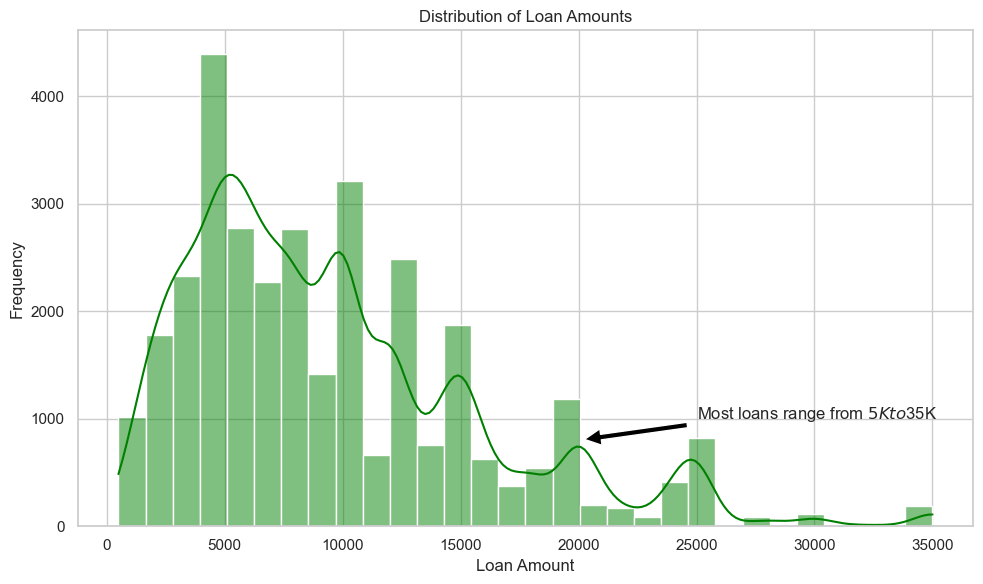

In [3]:
# Setting up the visual theme for Seaborn
sns.set(style="whitegrid")

# Descriptive statistics summary
print(df.describe())

# Plot 1: Distribution of loan amounts
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'], kde=True, color="green", bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.annotate('Most loans range from $5K to $35K', xy=(20000, 800), xytext=(25000, 1000),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.tight_layout()
plt.show()

## Predicting probability of default

### Lets start with LogisticRegression() model on the data, and examine how it predicts the probability of default.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Logistic Regression Model ###
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}\n")


Logistic Regression:
Confusion Matrix:
 [[6607  261]
 [1150  820]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6868
           1       0.76      0.42      0.54      1970

    accuracy                           0.84      8838
   macro avg       0.81      0.69      0.72      8838
weighted avg       0.83      0.84      0.82      8838

Accuracy: 0.8403484951346458



It shows that 84% of values for loan_status are predicted correctly by logistic regression model.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Define features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict loan default on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f"\nAccuracy: {accuracy}")


Confusion Matrix:
[[6361  507]
 [ 456 1514]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6868
           1       0.75      0.77      0.76      1970

    accuracy                           0.89      8838
   macro avg       0.84      0.85      0.84      8838
weighted avg       0.89      0.89      0.89      8838


Accuracy: 0.8910386965376782


In [55]:
### 2. Random Forest Classifier ###
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")

Random Forest:
Confusion Matrix:
 [[6833   35]
 [ 581 1389]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      6868
           1       0.98      0.71      0.82      1970

    accuracy                           0.93      8838
   macro avg       0.95      0.85      0.89      8838
weighted avg       0.93      0.93      0.93      8838

Accuracy: 0.9303009730708305



In [57]:
### 3. Support Vector Machine (SVM) ###
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate SVM
print("Support Vector Machine (SVM):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")

Support Vector Machine (SVM):
Confusion Matrix:
 [[6832   36]
 [1725  245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      6868
           1       0.87      0.12      0.22      1970

    accuracy                           0.80      8838
   macro avg       0.84      0.56      0.55      8838
weighted avg       0.81      0.80      0.74      8838

Accuracy: 0.8007467752885268



In [59]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


# Define feature variables (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Features (all except loan_status)
y = df['loan_status']  # Target (loan_status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.60%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6868
           1       0.96      0.74      0.84      1970

    accuracy                           0.94      8838
   macro avg       0.95      0.87      0.90      8838
weighted avg       0.94      0.94      0.93      8838


Confusion Matrix:
[[6811   57]
 [ 509 1461]]


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Separate the features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Assuming 'loan_status' is the target variable
y = df['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature data using StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the resampled training data
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test_scaled)

# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6899
           1       0.93      0.73      0.82      1939

    accuracy                           0.93      8838
   macro avg       0.93      0.86      0.89      8838
weighted avg       0.93      0.93      0.93      8838



In [92]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership            int8
person_emp_length             float64
loan_intent                      int8
loan_grade                       int8
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [63]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint

# Separate the features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Assuming 'loan_status' is the target variable
y = df['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature data using StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 1),
    'colsample_bytree': uniform(0.6, 1),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.1, 2),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model using RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters from the RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

# Make predictions on the test data using the best estimator
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters:  {'colsample_bytree': 0.9169220051562776, 'gamma': 0.08474637334304624, 'learning_rate': 0.17704037873750506, 'max_depth': 9, 'n_estimators': 103, 'reg_alpha': 0.696029796674973, 'reg_lambda': 1.24012234017873, 'subsample': 0.6971764937707685}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6899
           1       0.94      0.73      0.82      1939

    accuracy                           0.93      8838
   macro avg       0.94      0.86      0.89      8838
weighted avg       0.93      0.93      0.93      8838



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters:  {'colsample_bytree': 0.9854165025399161, 'gamma': 0.007983126110107097, 'learning_rate': 0.0792681476866447, 'max_depth': 6, 'n_estimators': 313, 'reg_alpha': 0.034388521115218396, 'reg_lambda': 1.9186408041575642, 'subsample': 0.8587799816000169}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6901
           1       0.97      0.72      0.82      1939

    accuracy                           0.93      8840
   macro avg       0.95      0.85      0.89      8840
weighted avg       0.93      0.93      0.93      8840

                       Feature  Importance
5                   loan_grade    0.308440
8          loan_percent_income    0.160136
2        person_home_ownership    0.152619
4                  loan_intent    0.109174
10  cb_person_cred_hist_length    0.075155
1                person_income    0.053675
3            person_emp_length    0.050677
0

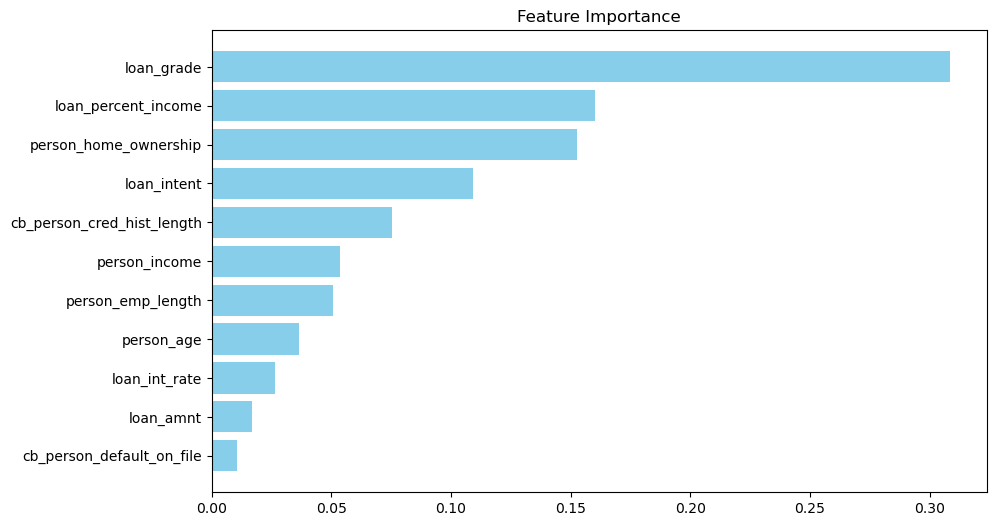

In [41]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import pandas as pd

# Separate the features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Assuming 'loan_status' is the target variable
y = df['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature data using StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 1),
    'colsample_bytree': uniform(0.6, 1),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0.1, 2),
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model using RandomizedSearchCV on the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters from the RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters: ", best_params)

# Make predictions on the test data using the best estimator
y_pred = random_search.best_estimator_.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# ----- Feature Importance -----

# Extract feature importance from the best model
best_xgb_model = random_search.best_estimator_
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_names = X.columns  # Assuming 'X' contains the feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important on top
plt.show()


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


# Define feature variables (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Features (all except loan_status)
y = df['loan_status']  # Target (loan_status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],                # Number of trees in the forest
    'max_depth': [10, 20, 30, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                     # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 93.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6831
           1       0.96      0.72      0.83      2009

    accuracy                           0.93      8840
   macro avg       0.94      0.86      0.89      8840
weighted avg       0.93      0.93      0.93      8840



This is the complete code combining Standard Scaler, SMOTE, XGBoost, and RandomizedSearchCV for hyperparameter tuning along with the extraction of important features. This will include all steps from data preprocessing to training, tuning, and feature importance extraction.

                       Feature  Importance
5                   loan_grade    0.308440
8          loan_percent_income    0.160136
2        person_home_ownership    0.152619
4                  loan_intent    0.109174
10  cb_person_cred_hist_length    0.075155
1                person_income    0.053675
3            person_emp_length    0.050677
0                   person_age    0.036575
7                loan_int_rate    0.026408
6                    loan_amnt    0.016696


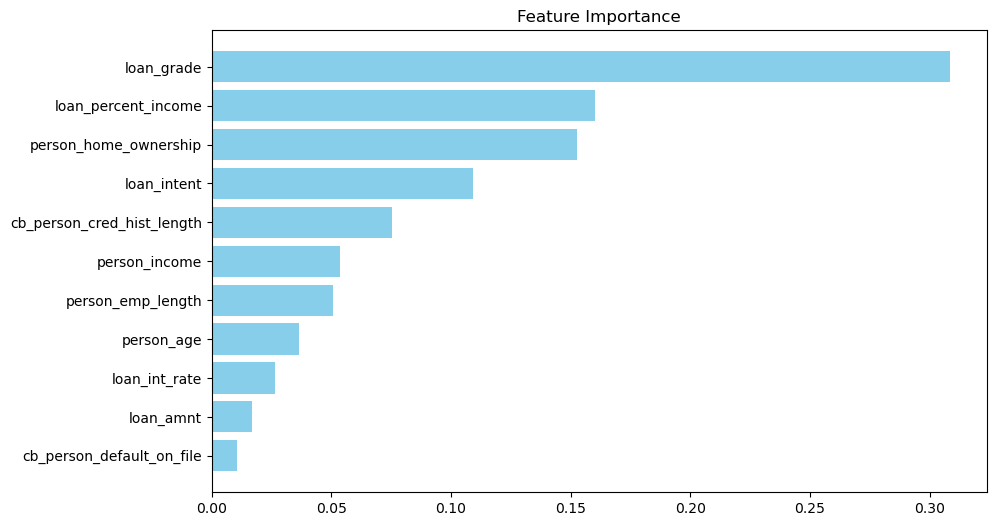

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the best model has already been trained using RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# Extract feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_names = X.columns  # Assuming 'X' contains the feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important on top
plt.show()

In [127]:
import numpy as np  # Import numpy
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define feature variables (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Features (all except loan_status)
y = df['loan_status']  # Target (loan_status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),         # Number of trees
    'max_depth': np.arange(5, 30, 5),                  # Maximum depth of each tree
    'min_samples_split': np.arange(2, 10, 2),          # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 5, 1),            # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                         # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  # Number of random combinations to try
                                   cv=3,        # 3-fold cross-validation
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)  # Use all available cores

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_params)

# Use the best estimator to predict on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters from Randomized Search: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Test Accuracy: 93.04%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6831
           1       0.96      0.72      0.83      2009

    accuracy                           0.93      8840
   macro avg       0.94      0.86      0.89      8840
weighted avg       0.93      0.93      0.93      8840



In [131]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE



# Define feature variables (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Features (all except loan_status)
y = df['loan_status']  # Target (loan_status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model with the balanced dataset
rf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after applying SMOTE: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Class distribution after SMOTE:
loan_status
0    16170
1    16170
Name: count, dtype: int64
Test Accuracy after applying SMOTE: 89.57%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6831
           1       0.78      0.75      0.77      2009

    accuracy                           0.90      8840
   macro avg       0.85      0.85      0.85      8840
weighted avg       0.89      0.90      0.90      8840



In [136]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Define feature variables (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Features (all except loan_status)
y = df['loan_status']  # Target (loan_status)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),         # Number of trees
    'max_depth': np.arange(5, 30, 5),                  # Maximum depth of each tree
    'min_samples_split': np.arange(2, 10, 2),          # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 5, 1),            # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                         # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  # Number of random combinations to try
                                   cv=3,        # 3-fold cross-validation
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)  # Use all available cores

# Fit RandomizedSearchCV to the SMOTE-balanced training data
random_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_params)

# Use the best estimator to predict on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after hyperparameter tuning: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'StandardScaler' is not defined

In [67]:
df


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


Depending on our goals, we can prioritize:
High Precision: If wrongly predicting a loan as a default is very costly (e.g., rejecting too many valid loans).
High Recall: If missing out on identifying defaults is riskier (e.g., approving too many bad loans).